#### Rewritten refactor.m from MatLab to Python
One error remaining - the last datapoint in spectrum_calibrated is different from MatLab. The rest should be identical

In [1]:
import os
import numpy as np
import scipy.interpolate
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt
import scipy.io
import cv2
import math

In [2]:
# Matlab-like round
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

def round_half_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n*multiplier - 0.5) / multiplier

def round(n, decimals=0):
    if n >= 0:
        rounded = round_half_up(n, decimals)
    else:
        rounded = round_half_down(n, decimals)
    # print(rounded)
    return int(rounded)

In [3]:
direc = 'data/10/'

images = [f for f in os.listdir(direc) if f.endswith('.tiff')]

matlab_counts_to_pC = 0.003706 # converting image values in number of electrons
image_gain = 100 / 32 # correction for CCD settings
acquisition_time_ms = 10
saturated_pixel_in_pC = 0.003706 # calibration factor
distance_gasjet_lanex_in_mm = 375
pixel_in_mm = 0.137 
pixel_in_mrad = 0.3653
pixel_in_msr = 0.00010481
tick_10mrad_px = 60 - round(10 / pixel_in_mrad)
tick0mrad_px = 60
tick10mrad_px = 60 + round(10 / pixel_in_mrad)
noise = 0.11
hor_min = 1163
hor_max = 1463
ver_min = 765
ver_max = 885
electron_pointing_pixel = 33 - 1 # added -1 
hor_image_size = hor_max - hor_min + 1
ver_image_size = ver_max - ver_min + 1
hor_pixels = np.arange(0, hor_image_size)
ver_pixels = np.arange(0, ver_image_size)
deflection_mm = np.zeros(hor_image_size)
spectrum_in_pixel = np.zeros(hor_image_size)
spectrum_in_MeV = np.zeros(hor_image_size)
for i in range(hor_image_size): # defining the mm in the image, added + 1
    if i <= electron_pointing_pixel:
        deflection_mm[i] = 0
    else:
        deflection_mm[i] = (i - electron_pointing_pixel) * pixel_in_mm
deflection_MeV = np.zeros(hor_image_size)
#---Assigning to each pixel its value in MeV with the loaded deflection curve------
mat = scipy.io.loadmat('Deflection_curve_Mixture_Feb28.mat')
# print(deflection_mm)
for i in range(electron_pointing_pixel, len(deflection_MeV)):
    xq = deflection_mm[i]
    if xq > 1:
       # deflection_MeV[i] = np.interp(xq, mat['deflection_curve_MeV'][:, 0], mat['deflection_curve_mm'][:, 0])
       deflection_MeV[i] = scipy.interpolate.interp1d(mat['deflection_curve_mm'][:, 0], mat['deflection_curve_MeV'][:, 0], kind='linear', assume_sorted=False, bounds_error=False)(xq)
print(deflection_MeV)
tick100MeV=0
tick50MeV=0
tick40MeV=0
tick30MeV=0
tick20MeV=0
tick15MeV=0
tick10MeV=0
tick8MeV=0
tick5MeV=0
laser_pointing_hor_cropped=electron_pointing_pixel

n_black_dots=4 # Here indicate the number of black dots, switches to active

black_dot_center_1=[56, 46] # Here indicate the #1 black dot center in pixel in the cropped image as written by MATLAB datatip
black_dot_radius_1=10 # Here indicate the #1 black dot radius in pixels in the cropped image
# --Repeate for all the black dots in the image-----
black_dot_center_2=[57, 114]
black_dot_radius_2=12
black_dot_center_3=[56, 187]
black_dot_radius_3=12
black_dot_center_4=[53, 261]
black_dot_radius_4=12
black_dot_center_5=[304, 271]
black_dot_radius_5=10
black_dot_center_6=[368, 270]
black_dot_radius_6=6
black_dot_center_7=[433, 269]
black_dot_radius_7=8
black_dot_center_8=[499, 269]
black_dot_radius_8=8
black_dot_center_9=[424, 70]
black_dot_radius_9=8

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.                 nan         nan
         nan 99.4441144  92.3371024  85.35076353 79.96585765 74.8112304
 70.52940747 66.58749872 63.11555827 60.00533517 57.28196386 54.55859254
 52.1107385  49.90091637 48.06185042 46.27008259 44.47831475 42.79512006
 41.41311864 40.03111722 38.64911579 37.4344222  36.30075418 35.1919806
 34.2092214  33.2264622  32.35787247 31.51353112 30.66918977 29.88549822
 29.1411451  28.46701385 27.80203692 27.13706    26.5468124  25.96107632
 25.39362469 24.87261647 24.35160825 23.84914696 23.37528066 22.92287038
 22.48151357 22.05860203 21.

for i in range(hor_image_size):  # defining the mm in the image
    if i <= electron_pointing_pixel:
        deflection_mm[i] = 0
    else:
        deflection_mm[i] = (i - electron_pointing_pixel) * pixel_in_mm

# Assigning to each pixel its value in MeV with the loaded deflection curve
mat = scipy.io.loadmat('Deflection_curve_Mixture_Feb28.mat')
# print(mat['deflection_curve_MeV'].shape)
for i in range(electron_pointing_pixel, len(deflection_MeV)):
    xq = deflection_mm[i]
    if xq > 1:
        # deflection_MeV[i] = np.interp(xq, mat['deflection_curve_MeV'][:,0], mat['deflection_curve_mm'][:,0]) # TODO original is first mm, then MeV
        deflection_MeV[i] = scipy.interpolate.interp1d(mat['deflection_curve_mm'][:, 0], mat['deflection_curve_MeV'][:, 0], kind='linear', assume_sorted=False, fill_value="extrapolate")(xq)
# print(deflection_MeV)

In [4]:
for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 70 < deflection_MeV[i] < 101:
        tick100MeV = i+1
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 40 < deflection_MeV[i] < 51:
        tick50MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 30 < deflection_MeV[i] < 41:
        tick40MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 20 < deflection_MeV[i] < 31:
        tick30MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 15 < deflection_MeV[i] < 21:
        tick20MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 12 < deflection_MeV[i] < 15.5:
        tick15MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 8 < deflection_MeV[i] < 10.5:
        tick10MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 6 < deflection_MeV[i] < 8.2:
        tick8MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 4.8 < deflection_MeV[i] < 5.2:
        tick5MeV = i
        break

for i in range(laser_pointing_hor_cropped, len(deflection_MeV)):
    if 2.9 < deflection_MeV[i] < 3.2:
        tick3MeV = i
        break


data/4/Electron_Spectr__21782323__20220223_121835073_1.tiff
0.008791208791208791
(121, 301)


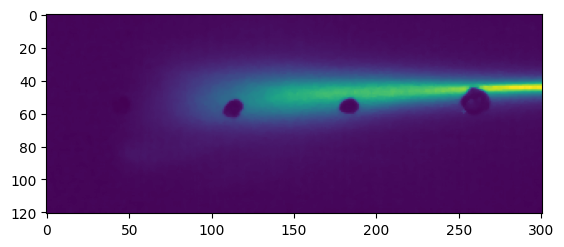

In [5]:
i = 1 # image selection
images = sorted(images)
filename = direc + images[i - 1] # BECAUSE MATLAB INDEXES FROM 1
# filename = "Electron_Spectra_ALFA/8/Electron_Spectr__21782323__20220225_180101421_36.tiff"
print(filename)
I = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
# I = Image.open(filename)
# I = np.moveaxis(I, [1], [0])
# print(np.mean(I))
# I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
# I_gray = np.transpose(I_gray)
I_gray = cv2.normalize(I.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
# I_gray = np.transpose(I_gray)
#print(np.mean(I_gray))
I_crop = I_gray[ver_min-1:ver_max, hor_min-1:hor_max]
print(I_crop[-1, -1])
print(I_crop.shape)

# print(np.mean(I_crop))
I_crop = ndimage.median_filter(I_crop, size=3)
plt.imshow(I_crop)
# I_crop[I_crop <= noise] = 0
I_crop = I_crop - noise # subtracting noise
for j in range(hor_image_size):
    for l in range(ver_image_size):
        if I_crop[l,j] < 0: # or j < electron_pointing_pixel + 1
            I_crop[l,j] = 0
        else:
            I_crop[l,j] = I_crop[l,j] + noise
I_wo_black_dots = I_crop
# print(np.mean(I_wo_black_dots))

for k in range(n_black_dots):
    aux = str(k+1)
    aux_center = 'black_dot_center_' + aux
    aux_radius = 'black_dot_radius_' + aux
    center = eval(aux_center)
    center_hor = center[0]
    center_ver = center[1]
    radius = eval(aux_radius)
    for l in range(hor_image_size):
        for m in range(ver_image_size):
            if l < center_hor+radius and m < center_ver+radius and l > center_hor-radius and m > center_ver-radius \
                    and ((m-center_ver)**2 + (l-center_hor)**2)**0.5 < radius:
                aux_x_min = center_hor - round((radius**2 - (m-center_ver)**2)**0.5)
                aux_x_max = center_hor + round((radius**2 - (m-center_ver)**2)**0.5)
                aux_y_min = center_ver - round((radius**2 - (l-center_hor)**2)**0.5)
                aux_y_max = center_ver + round((radius**2 - (l-center_hor)**2)**0.5)
                I_wo_black_dots[m][l] = ((aux_x_max-l)/(aux_x_max-aux_x_min))*I_crop[m][aux_x_min] + \
                                         ((l-aux_x_min)/(aux_x_max-aux_x_min))*I_crop[m][aux_x_max]


I_calibrated = (I_wo_black_dots * 0.003706) / (image_gain * pixel_in_msr * acquisition_time_ms)
noise_calibrated = noise * 1000 * 0.003706 / (image_gain * pixel_in_msr * acquisition_time_ms)
horizontal_profile = np.sum(I_wo_black_dots, axis=0)
vertical_profile = sum(I_wo_black_dots.T) # transpose
print(horizontal_profile)
for j in range(electron_pointing_pixel, hor_image_size - 1):
    spectrum_in_pixel[j] = horizontal_profile[j] # spectrum in pixel
# spectrum in MeV
spectrum_in_MeV[1] = spectrum_in_pixel[1]
for j in range(electron_pointing_pixel, hor_image_size - 1):
    spectrum_in_MeV[j] = (spectrum_in_pixel[j]) / (deflection_MeV[j - 1] - deflection_MeV[j])
# calibration charge in nA/MeV
spectrum_calibrated = (spectrum_in_MeV * 0.003706) / (image_gain * acquisition_time_ms)

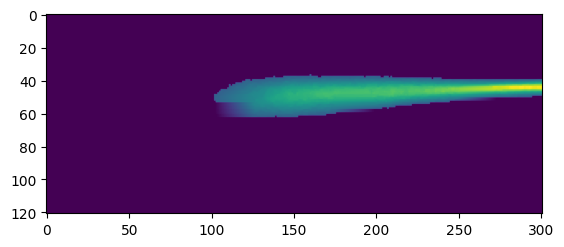

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.                 nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.     

/var/folders/wt/_xklnt_x7m9ckxtll_10y8840000gn/T/ipykernel_90623/4082990458.py:38: RuntimeWarning: invalid value encountered in scalar divide
  spectrum_in_MeV[j] = (spectrum_in_pixel[j]) / (deflection_MeV[j-1] - deflection_MeV[j])


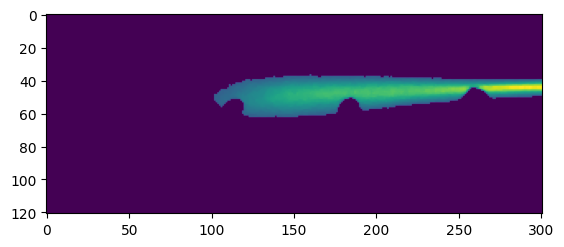

In [6]:
I_wo_black_dots = I_crop.copy()
for k in range(1, n_black_dots + 1):
    aux = str(k)
    aux_center = 'black_dot_center_' + aux
    aux_radius = 'black_dot_radius_' + aux
    center = eval(aux_center)
    center_hor = center[1]
    center_ver = center[0]
    # print(I_wo_black_dots[center[0], center[1]])
    # print(center_hor)
    radius = eval(aux_radius)
    for l in range(hor_image_size):
        for m in range(ver_image_size):
            if l < center_hor + radius and m < center_ver + radius and l > center_hor - radius and m > center_ver - radius \
                and math.sqrt((m - center_ver)**2 + (l - center_hor)**2) < radius:
                aux_x_min = center_hor - round(math.sqrt(radius**2 - (m - center_ver)**2))
                aux_x_max = center_hor + round(math.sqrt(radius**2 - (m - center_ver)**2))
                aux_y_min = center_ver - round(math.sqrt(radius**2 - (l - center_hor)**2))
                aux_y_max = center_ver + round(math.sqrt(radius**2 - (l - center_hor)**2))
                # print(m, l)
                # print(((aux_x_max - l) / (aux_x_max - aux_x_min)) * I_crop[m,aux_x_min] + ((l - aux_x_min) / (aux_x_max - aux_x_min)) * I_crop[m,aux_x_max])
                I_wo_black_dots[m,l] = ((aux_x_max - l) / (aux_x_max - aux_x_min)) * I_crop[m,aux_x_min] + ((l - aux_x_min) / (aux_x_max - aux_x_min)) * I_crop[m,aux_x_max]
# I_wo_black_dots = (I_wo_black_dots*0.003706)/(image_gain*pixel_in_msr*acquisition_time_ms);
# print(I_wo_black_dots[black_dot_center_1[0],black_dot_center_1[1]])
plt.imshow(I_wo_black_dots)
plt.show()
plt.imshow(I_crop)
horizontal_profile = np.sum(I_wo_black_dots, axis=0)
# print(horizontal_profile)
# print(len(horizontal_profile))
# print(np.mean(horizontal_profile))
vertical_profile = np.sum(I_wo_black_dots, axis=1)
for j in range(electron_pointing_pixel, hor_image_size):
    spectrum_in_pixel[j] = horizontal_profile[j] # spectrum in pixel
# spectrum in MeV
spectrum_in_MeV[0] = spectrum_in_pixel[0]
for j in range(electron_pointing_pixel, hor_image_size):
    spectrum_in_MeV[j] = (spectrum_in_pixel[j]) / (deflection_MeV[j-1] - deflection_MeV[j])
# calibration charge in nA/MeV
spectrum_calibrated = (spectrum_in_MeV * 3.706) / (image_gain * acquisition_time_ms)
print(spectrum_calibrated)

(2.0, 8.0)

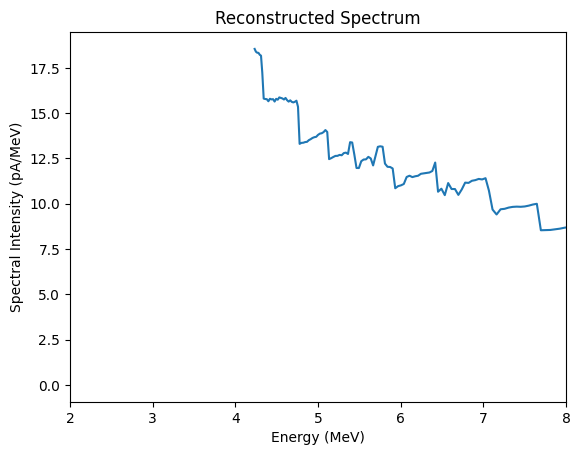

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(5)
plt.title('Reconstructed Spectrum')
# print(spectrum_calibrated)
plt.plot(deflection_MeV, spectrum_calibrated)  # plot without fit
plt.ylabel('Spectral Intensity (pA/MeV)')
plt.xlabel('Energy (MeV)')
plt.xlim([2, 8])

In [8]:
# from scipy.optimize import curve_fit
# 
# # Fit horizontal profile
# horizontal_divergence_fit, _ = curve_fit(lambda x, a1, b1, c1: a1 * np.exp(-((x - b1)/c1)**2), 
#                                          verpixels, horizontal_profile, p0=[40, 100, 10])
# 
# # Fit vertical profile
# vertical_divergence_fit, _ = curve_fit(lambda x, a1, b1, c1: a1 * np.exp(-((x - b1)/c1)**2), 
#                                        ver_pixels, vertical_profile, p0=[40, 100, 10])
# 
# # Compute current above 20 MeV and divergence above 20 MeV
# current_above_20MeV_aux = np.sum(I_wo_black_dots[:, electron_pointing_pixel+1:tick20MeV], axis=0)
# current_above_20MeV[i] = np.sum(current_above_20MeV_aux)
# divergence_above_20MeV_aux = I_wo_black_dots[:, electron_pointing_pixel+1:tick20MeV]
# divergence_above_20MeV[i,:] = np.sum(divergence_above_20MeV_aux, axis=1)
# 
# # Store results
# amplitude_hor[i] = horizontal_divergence_fit[0]
# pointing_hor[i] = horizontal_divergence_fit[1]
# divergence_hor[i] = horizontal_divergence_fit[2]
# 
# amplitude_ver[i] = vertical_divergence_fit[0]
# pointing_ver[i] = vertical_divergence_fit[1]
# divergence_ver[i] = vertical_divergence_fit[2]
